In [1]:
import numpy as np
from PIL import Image, ImageOps
from objectreader import ObjModel
import graphicsfunction as graphfunc
import objectreader as objFunc
import random

folder = f'img2/'

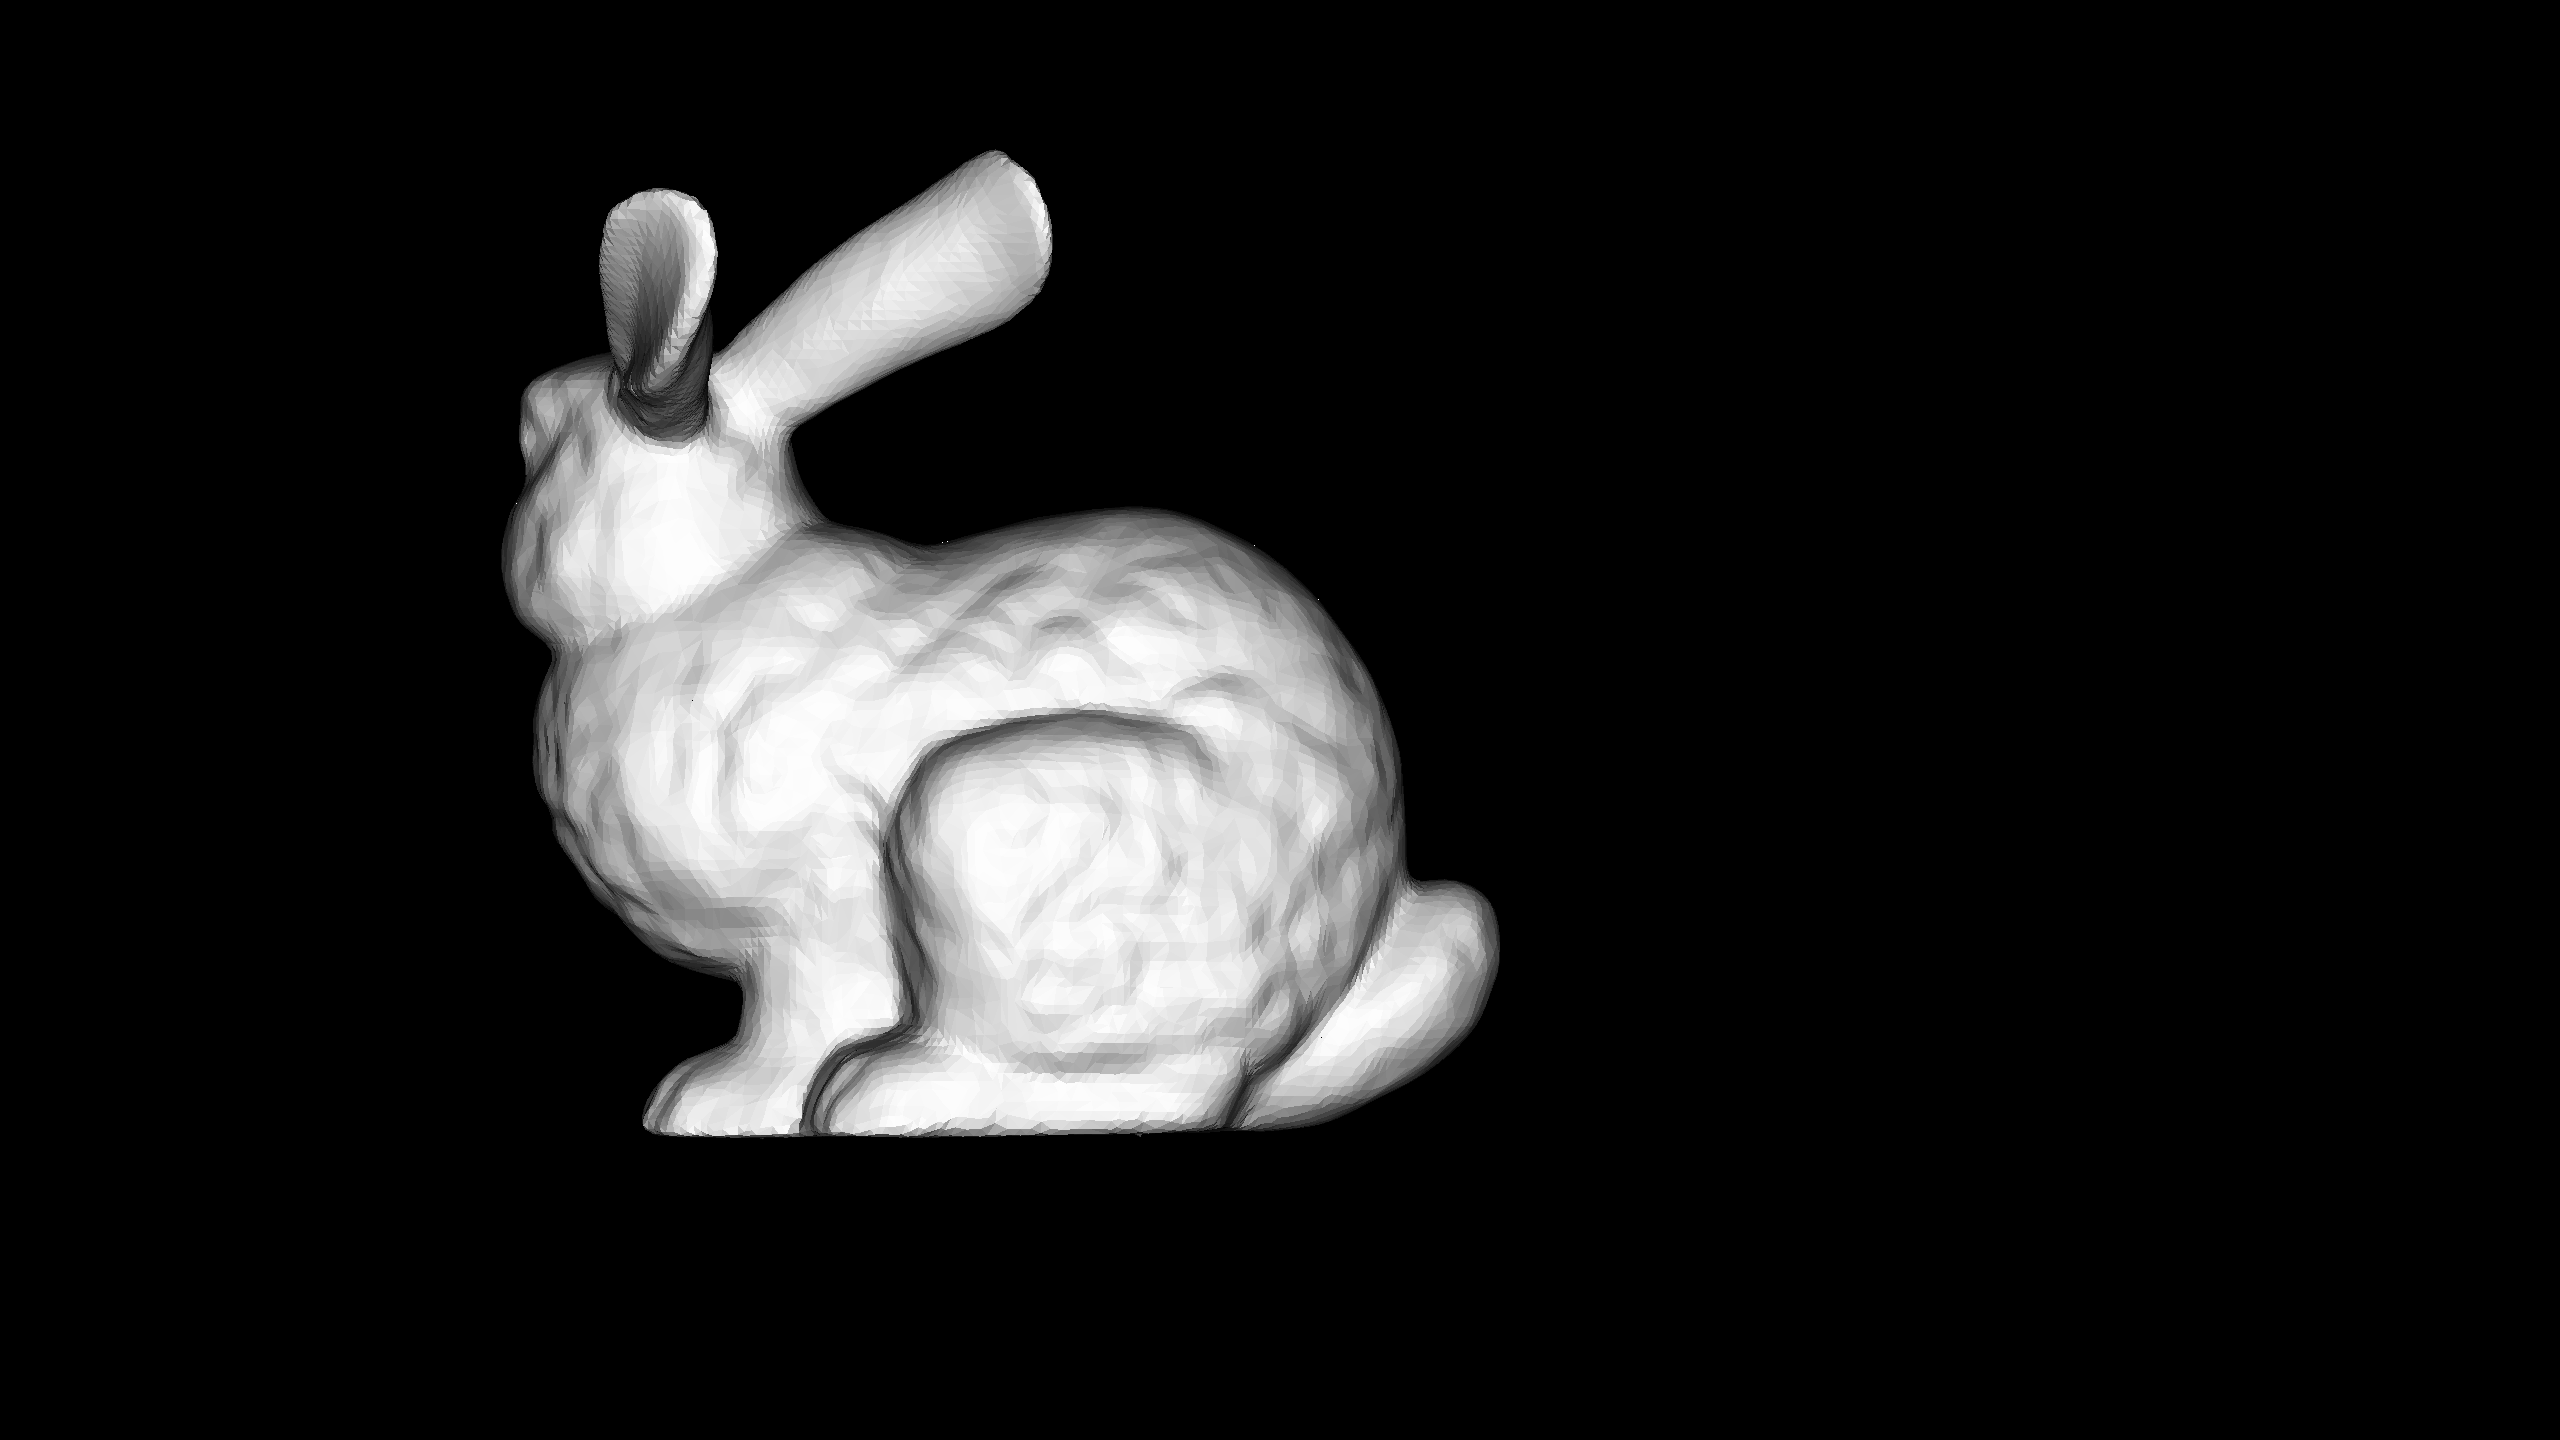

In [7]:
ar = np.full((2560, 1440), fill_value=0, dtype=np.uint8)
zBuffer = np.full((2560, 1440), fill_value=10000, dtype=int)

obj = ObjModel()
obj.readModel('model/model_1.obj')

for pol in obj.polygons:
    vertexs = objFunc.movePol(obj.getVertexFromPolygon(pol), 10000, [1000, 300, 0])
    n = graphfunc.getNormal(vertexs)
    alpha = np.dot(n, [0, 0, 1]) / (np.linalg.norm(n))
    if alpha < 0:
        graphfunc.drawTriangle(ar, vertexs, 255 - 255 * alpha, zBuffer)

img = ImageOps.flip(Image.fromarray(np.transpose(ar), mode="L"))
img.save(folder + "a_9.jpg")
img